# Introducing Scikit-Learn

Copied from https://github.com/jakevdp/PythonDataScienceHandbook

In [45]:
import seaborn as sns
iris = sns.load_dataset('iris')

Now let's plot the results with some styles changed! A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

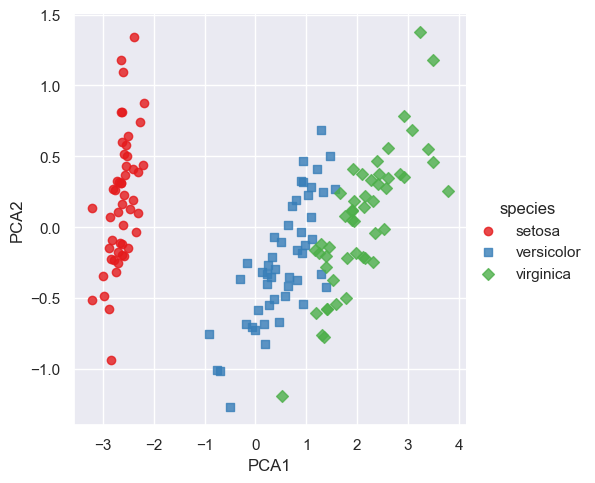

In [46]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', fit_reg=False, markers=["o", "s", "D"], palette="Set1");

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.